In [52]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf

import matplotlib.colors as mcolors

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_statistic as ART_sta

import warnings
warnings.filterwarnings('ignore')

In [5]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

Tr = [5,  10,  20,  50, 100, 200]
Fi = 1 - 1/np.array(Tr)

In [88]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson')),
    DEM = gpd.read_file(os.path.join(veneto_dir,'DEM','Italy_dem_800.geojson'))   
else:
    raise SystemExit(f"File not found: {veneto_dir}")

# REGIONS = REGIONS.rename(columns={"reg_name": "Region"})
# REGIONS['Region'] = REGIONS['Region'].replace('Emilia Romagna', 'Emilia-Romagna')

In [7]:
obs_base = os.path.join('/','media','arturo','T9','Data','Italy','Rain_Gauges_QC')
dir_base = os.path.join('/','media','arturo','T9','Data','Italy')

In [8]:
METADATA = pd.read_csv(os.path.join(obs_base, 'data', 'METADATA', 'METADATA_FTS_QCv4_Case1_wAIRHO_v3_1dy.csv'))
ISO_names = np.unique(METADATA.ISO.values)

In [10]:
IMERG_RE_raw, IMERG_RE_down = ART_sta.extract_all_quantiles('IMERG')
ERA5_RE_raw, ERA5_RE_down = ART_sta.extract_all_quantiles('ERA5')
CMORPH_RE_raw, CMORPH_RE_down = ART_sta.extract_all_quantiles('CMORPH')
MSWEP_RE_raw, MSWEP_RE_down = ART_sta.extract_all_quantiles('MSWEP')
CHIRPS_RE_raw, CHIRPS_RE_down = ART_sta.extract_all_quantiles('CHIRPS')

GSMaP_RE_raw, GSMaP_RE_down = ART_sta.extract_all_quantiles('GSMaP')

ENSEMBLE_RE_raw, ENSEMBLE_RE_down = ART_sta.extract_all_quantiles('ENSEMBLE_ALL_mean')

In [11]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

../figures/Article_down/Products_DOWN_RE_dist_median.png


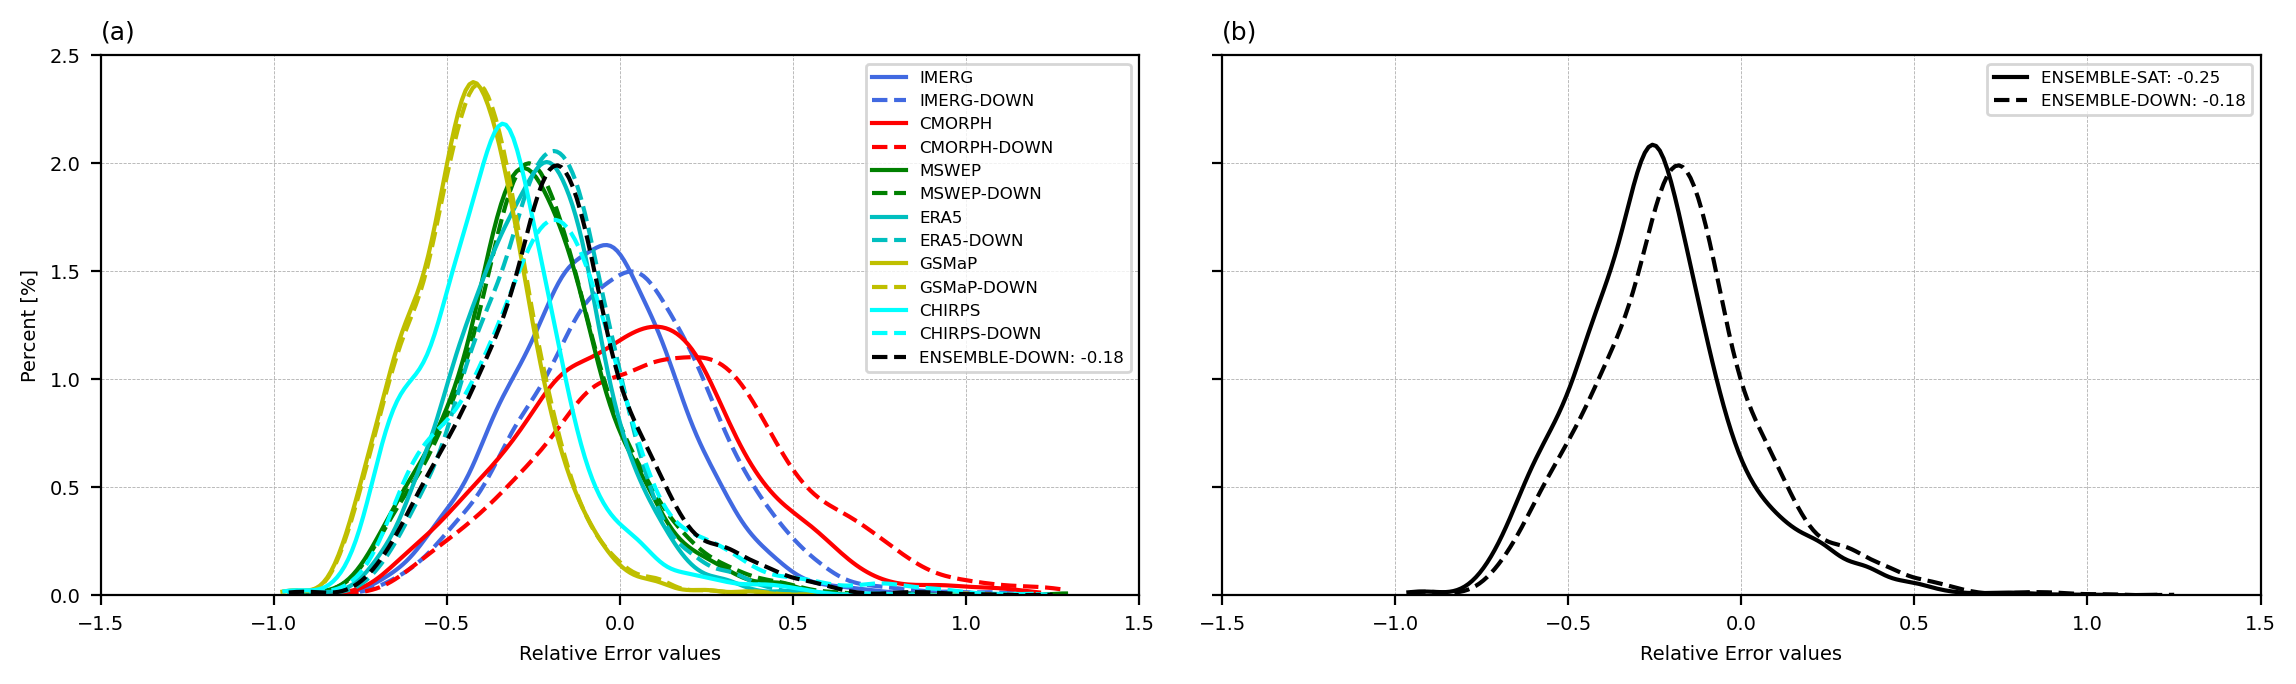

In [12]:
fig = plt.figure(figsize=(12,3),dpi=200)
gs = gridspec.GridSpec(1,2)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(IMERG_RE_raw,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG_RE_raw)), np.nanmax(np.array(IMERG_RE_raw))))
sns.kdeplot(IMERG_RE_down,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG-DOWN',
            clip=(np.nanmin(np.array(IMERG_RE_down)), np.nanmax(np.array(IMERG_RE_down))))

sns.kdeplot(CMORPH_RE_raw,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH',
            clip=(np.nanmin(np.array(CMORPH_RE_raw)), np.nanmax(np.array(CMORPH_RE_raw))))
sns.kdeplot(CMORPH_RE_down,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH-DOWN',
            clip=(np.nanmin(np.array(CMORPH_RE_down)), np.nanmax(np.array(CMORPH_RE_down))))

sns.kdeplot(MSWEP_RE_raw,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP',
            clip=(np.nanmin(np.array(MSWEP_RE_raw)), np.nanmax(np.array(MSWEP_RE_raw))))
sns.kdeplot(MSWEP_RE_down,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP-DOWN',
            clip=(np.nanmin(np.array(MSWEP_RE_down)), np.nanmax(np.array(MSWEP_RE_down))))

sns.kdeplot(ERA5_RE_raw,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5',
            clip=(np.nanmin(np.array(ERA5_RE_raw)), np.nanmax(np.array(ERA5_RE_raw))))
sns.kdeplot(ERA5_RE_down,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5-DOWN',
            clip=(np.nanmin(np.array(ERA5_RE_down)), np.nanmax(np.array(ERA5_RE_down))))

sns.kdeplot(GSMaP_RE_raw,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP',
            clip=(np.nanmin(np.array(GSMaP_RE_raw)), np.nanmax(np.array(GSMaP_RE_raw))))
sns.kdeplot(GSMaP_RE_down,color=colors[4], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP-DOWN',
            clip=(np.nanmin(np.array(GSMaP_RE_down)), np.nanmax(np.array(GSMaP_RE_down))))

# sns.kdeplot(GSMaP_RE_raw_NC,color=colors[5],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP_NC',
#             clip=(np.nanmin(np.array(GSMaP_RE_raw_NC)), np.nanmax(np.array(GSMaP_RE_raw_NC))))
# sns.kdeplot(GSMaP_RE_down_NC,color=colors[5], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP-DOWN_NC',
#             clip=(np.nanmin(np.array(GSMaP_RE_down_NC)), np.nanmax(np.array(GSMaP_RE_down_NC))))

sns.kdeplot(CHIRPS_RE_raw,color=colors[7],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS',
            clip=(np.nanmin(np.array(CHIRPS_RE_raw)), np.nanmax(np.array(CHIRPS_RE_raw))))
sns.kdeplot(CHIRPS_RE_down,color=colors[7], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS-DOWN',
            clip=(np.nanmin(np.array(CHIRPS_RE_down)), np.nanmax(np.array(CHIRPS_RE_down))))

sns.kdeplot(ENSEMBLE_RE_down,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(ENSEMBLE_RE_down),2)}',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_down)), np.nanmax(np.array(ENSEMBLE_RE_down))))

ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(a)',fontsize=9, loc='left')

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 1])

sns.kdeplot(ENSEMBLE_RE_raw,color='k',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-SAT: {np.round(np.nanmean(ENSEMBLE_RE_raw),2)}',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_raw)), np.nanmax(np.array(ENSEMBLE_RE_raw))))
sns.kdeplot(ENSEMBLE_RE_down,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(ENSEMBLE_RE_down),2)}',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_down)), np.nanmax(np.array(ENSEMBLE_RE_down))))

ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.set_yticklabels('')
ax1.set_ylabel('')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(b)',fontsize=9, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.15)

salida = '../figures/Article_down/Products_DOWN_RE_dist_median.png'
print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

## Spatial Analysis 

In [136]:
def get_relative_error(product, val_max=1.1):

    hdf5_file = os.path.join(dir_base,'statistics',f'statistics_obs_{product}.h5')
    data = pd.HDFStore(hdf5_file, mode='r')

    keys = data.keys()
    keys_QUANTILES = [k for k in keys if k.endswith("/QUANTILES")]
    keys_INFO = [k for k in keys if k.endswith('/INFO')]

    lats, lons, elevs = [], [], []
    RED, REDn = [], []
    RER, RERn = [], []
    for nn in range(len(keys_INFO)):
        lat = data[keys_INFO[nn]]['lat_obs'].values[0]
        lon = data[keys_INFO[nn]]['lon_obs'].values[0]
        elev = data[keys_INFO[nn]]['elev_obs'].values[0]
        RED_ = data[keys_QUANTILES[nn]].RE_down.values[3]
        RER_ = data[keys_QUANTILES[nn]].RE_raw.values[3]

        lats.append(lat)
        lons.append(lon)
        elevs.append(elev)
        RED.append(RED_)
        RER.append(RER_)

    REDn = (RED - np.nanmin(RED))/(np.nanmax(RED) - np.nanmin(RED))
    RERn = (RER - np.nanmin(RER))/(np.nanmax(RER) - np.nanmin(RER))

    DF_DATA = pd.DataFrame({'LON':lons, 'LAT':lats, 'ELEV':elevs, 'RER':RER, 'RERn':RERn, 'RED':RED, 'REDn':REDn})
    DF_DATA.loc[DF_DATA['RER'] > val_max, 'RER'] = np.nan
    DF_DATA.loc[DF_DATA['RER'].isna(), 'RED'] = np.nan

    return DF_DATA

In [137]:
DF_IMERG = get_relative_error('IMERG')
DF_CMORPH = get_relative_error('CMORPH')
DF_MSWEP = get_relative_error('MSWEP')
DF_ERA5 = get_relative_error('ERA5')
DF_GSMaP = get_relative_error('GSMaP')
DF_CHIRPS = get_relative_error('CHIRPS')

DF_ENSEMBLE = get_relative_error('ENSEMBLE_ALL_mean')

../figures/Article_down/Products_DOWN_RE_dist_median.png


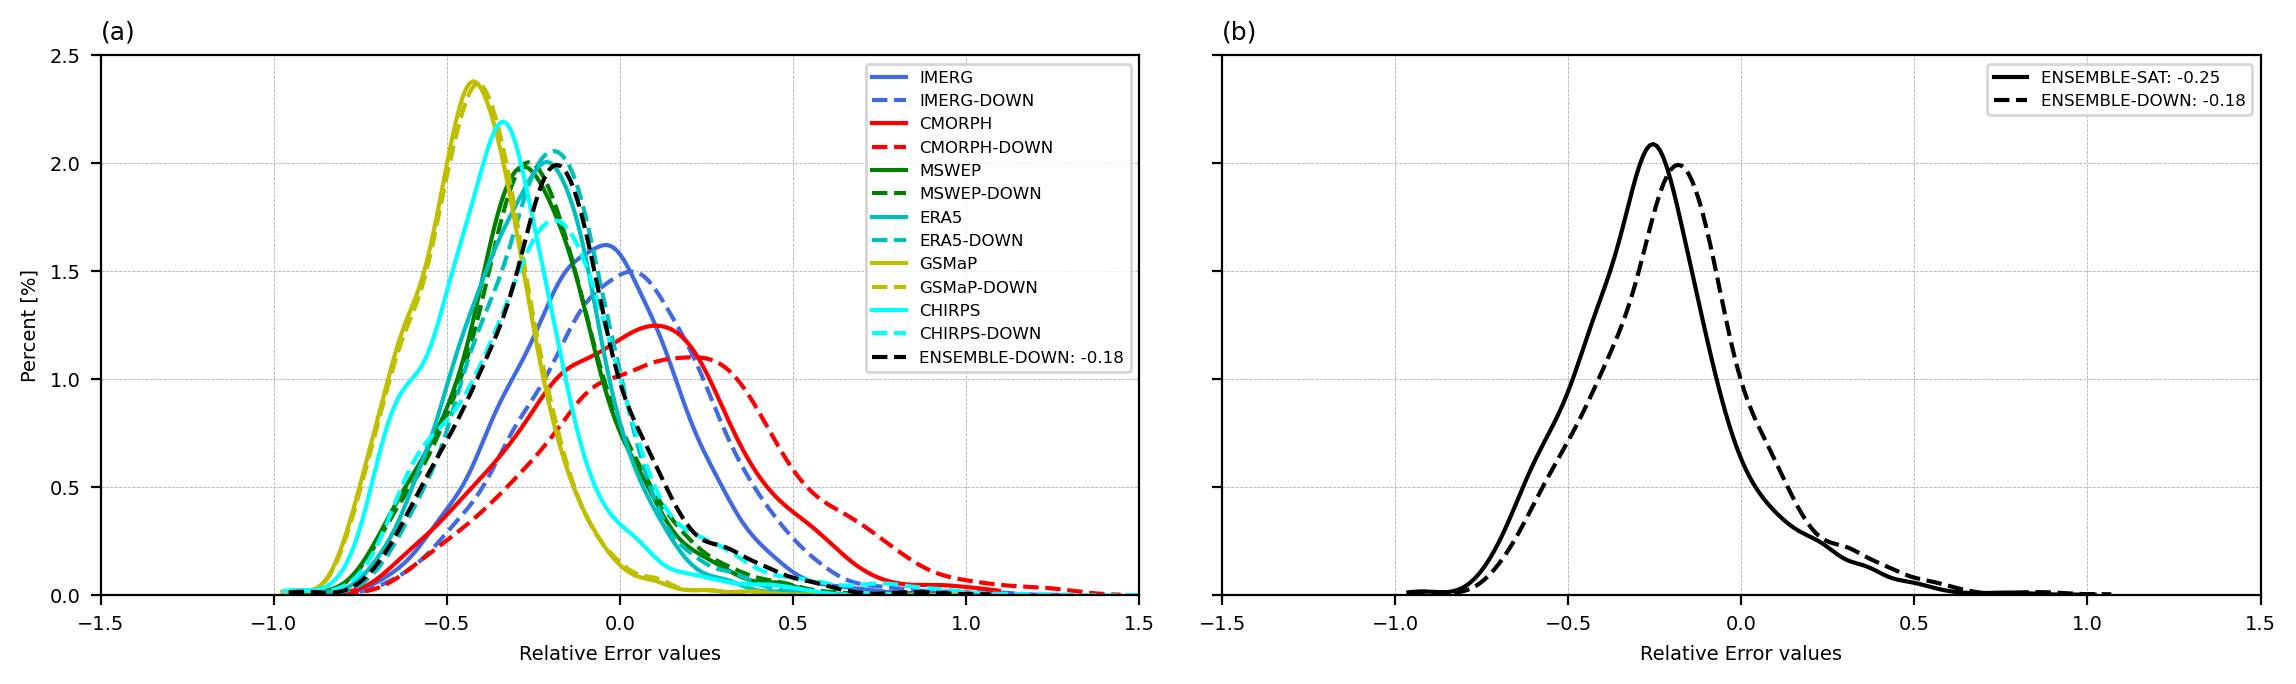

In [138]:
fig = plt.figure(figsize=(12,3),dpi=200)
gs = gridspec.GridSpec(1,2)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(DF_IMERG.RER,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(DF_IMERG.RER)), np.nanmax(np.array(DF_IMERG.RER))))
sns.kdeplot(DF_IMERG.RED,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG-DOWN',
            clip=(np.nanmin(np.array(DF_IMERG.RED)), np.nanmax(np.array(DF_IMERG.RED))))

sns.kdeplot(DF_CMORPH.RER,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH',
            clip=(np.nanmin(np.array(DF_CMORPH.RER)), np.nanmax(np.array(DF_CMORPH.RER))))
sns.kdeplot(DF_CMORPH.RED,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CMORPH-DOWN',
            clip=(np.nanmin(np.array(DF_CMORPH.RED)), np.nanmax(np.array(DF_CMORPH.RED))))

sns.kdeplot(DF_MSWEP.RER,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP',
            clip=(np.nanmin(np.array(DF_MSWEP.RER)), np.nanmax(np.array(DF_MSWEP.RER))))
sns.kdeplot(DF_MSWEP.RED,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'MSWEP-DOWN',
            clip=(np.nanmin(np.array(DF_MSWEP.RED)), np.nanmax(np.array(DF_MSWEP.RED))))

sns.kdeplot(DF_ERA5.RER,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5',
            clip=(np.nanmin(np.array(DF_ERA5.RER)), np.nanmax(np.array(DF_ERA5.RER))))
sns.kdeplot(DF_ERA5.RED,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ERA5-DOWN',
            clip=(np.nanmin(np.array(DF_ERA5.RED)), np.nanmax(np.array(DF_ERA5.RED))))

sns.kdeplot(DF_GSMaP.RER,color=colors[4],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP',
            clip=(np.nanmin(np.array(DF_GSMaP.RER)), np.nanmax(np.array(DF_GSMaP.RER))))
sns.kdeplot(DF_GSMaP.RED,color=colors[4], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'GSMaP-DOWN',
            clip=(np.nanmin(np.array(DF_GSMaP.RED)), np.nanmax(np.array(DF_GSMaP.RED))))

sns.kdeplot(DF_CHIRPS.RER,color=colors[7],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS',
            clip=(np.nanmin(np.array(DF_CHIRPS.RER)), np.nanmax(np.array(DF_CHIRPS.RER))))
sns.kdeplot(DF_CHIRPS.RED,color=colors[7], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'CHIRPS-DOWN',
            clip=(np.nanmin(np.array(DF_CHIRPS.RED)), np.nanmax(np.array(DF_CHIRPS.RED))))

sns.kdeplot(DF_ENSEMBLE.RED,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(DF_ENSEMBLE.RED),2)}',
            clip=(np.nanmin(np.array(DF_ENSEMBLE.RED)), np.nanmax(np.array(DF_ENSEMBLE.RED))))

ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(a)',fontsize=9, loc='left')

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 1])

sns.kdeplot(DF_ENSEMBLE.RER,color='k',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-SAT: {np.round(np.nanmean(DF_ENSEMBLE.RER),2)}',
            clip=(np.nanmin(np.array(DF_ENSEMBLE.RER)), np.nanmax(np.array(DF_ENSEMBLE.RER))))
sns.kdeplot(DF_ENSEMBLE.RED,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-DOWN: {np.round(np.nanmean(DF_ENSEMBLE.RED),2)}',
            clip=(np.nanmin(np.array(DF_ENSEMBLE.RED)), np.nanmax(np.array(DF_ENSEMBLE.RED))))

ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,2.5)
ax1.set_yticklabels('')
ax1.set_ylabel('')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(b)',fontsize=9, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.15)

salida = '../figures/Article_down/Products_DOWN_RE_dist_median.png'
print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

In [189]:
levels = np.arange(-1,1.1,0.1)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=256)

In [190]:
np.nanmax(DF_IMERG.RED),np.nanmax(DF_CMORPH.RED),np.nanmax(DF_MSWEP.RED),np.nanmax(DF_ERA5.RED),np.nanmax(DF_GSMaP.RED),np.nanmax(DF_CHIRPS.RED)

(1.2924493944305242,
 1.4469239341308704,
 1.0877101310548207,
 0.850089490653102,
 1.071325320829358,
 1.5256533553050853)

In [195]:
plt.plot(DF_GSMaP.RED)

KeyboardInterrupt: 

In [191]:
DF_LIST = [DF_IMERG, DF_CMORPH, DF_MSWEP, DF_ERA5, DF_GSMaP, DF_CHIRPS]
names_list = ['IMERG', 'CMORPH', 'MSWEP', 'ERA5', 'GSMaP', 'CHIRPS']
letters_list = ['(a)','(b)','(c)','(d)','(e)','(f)']

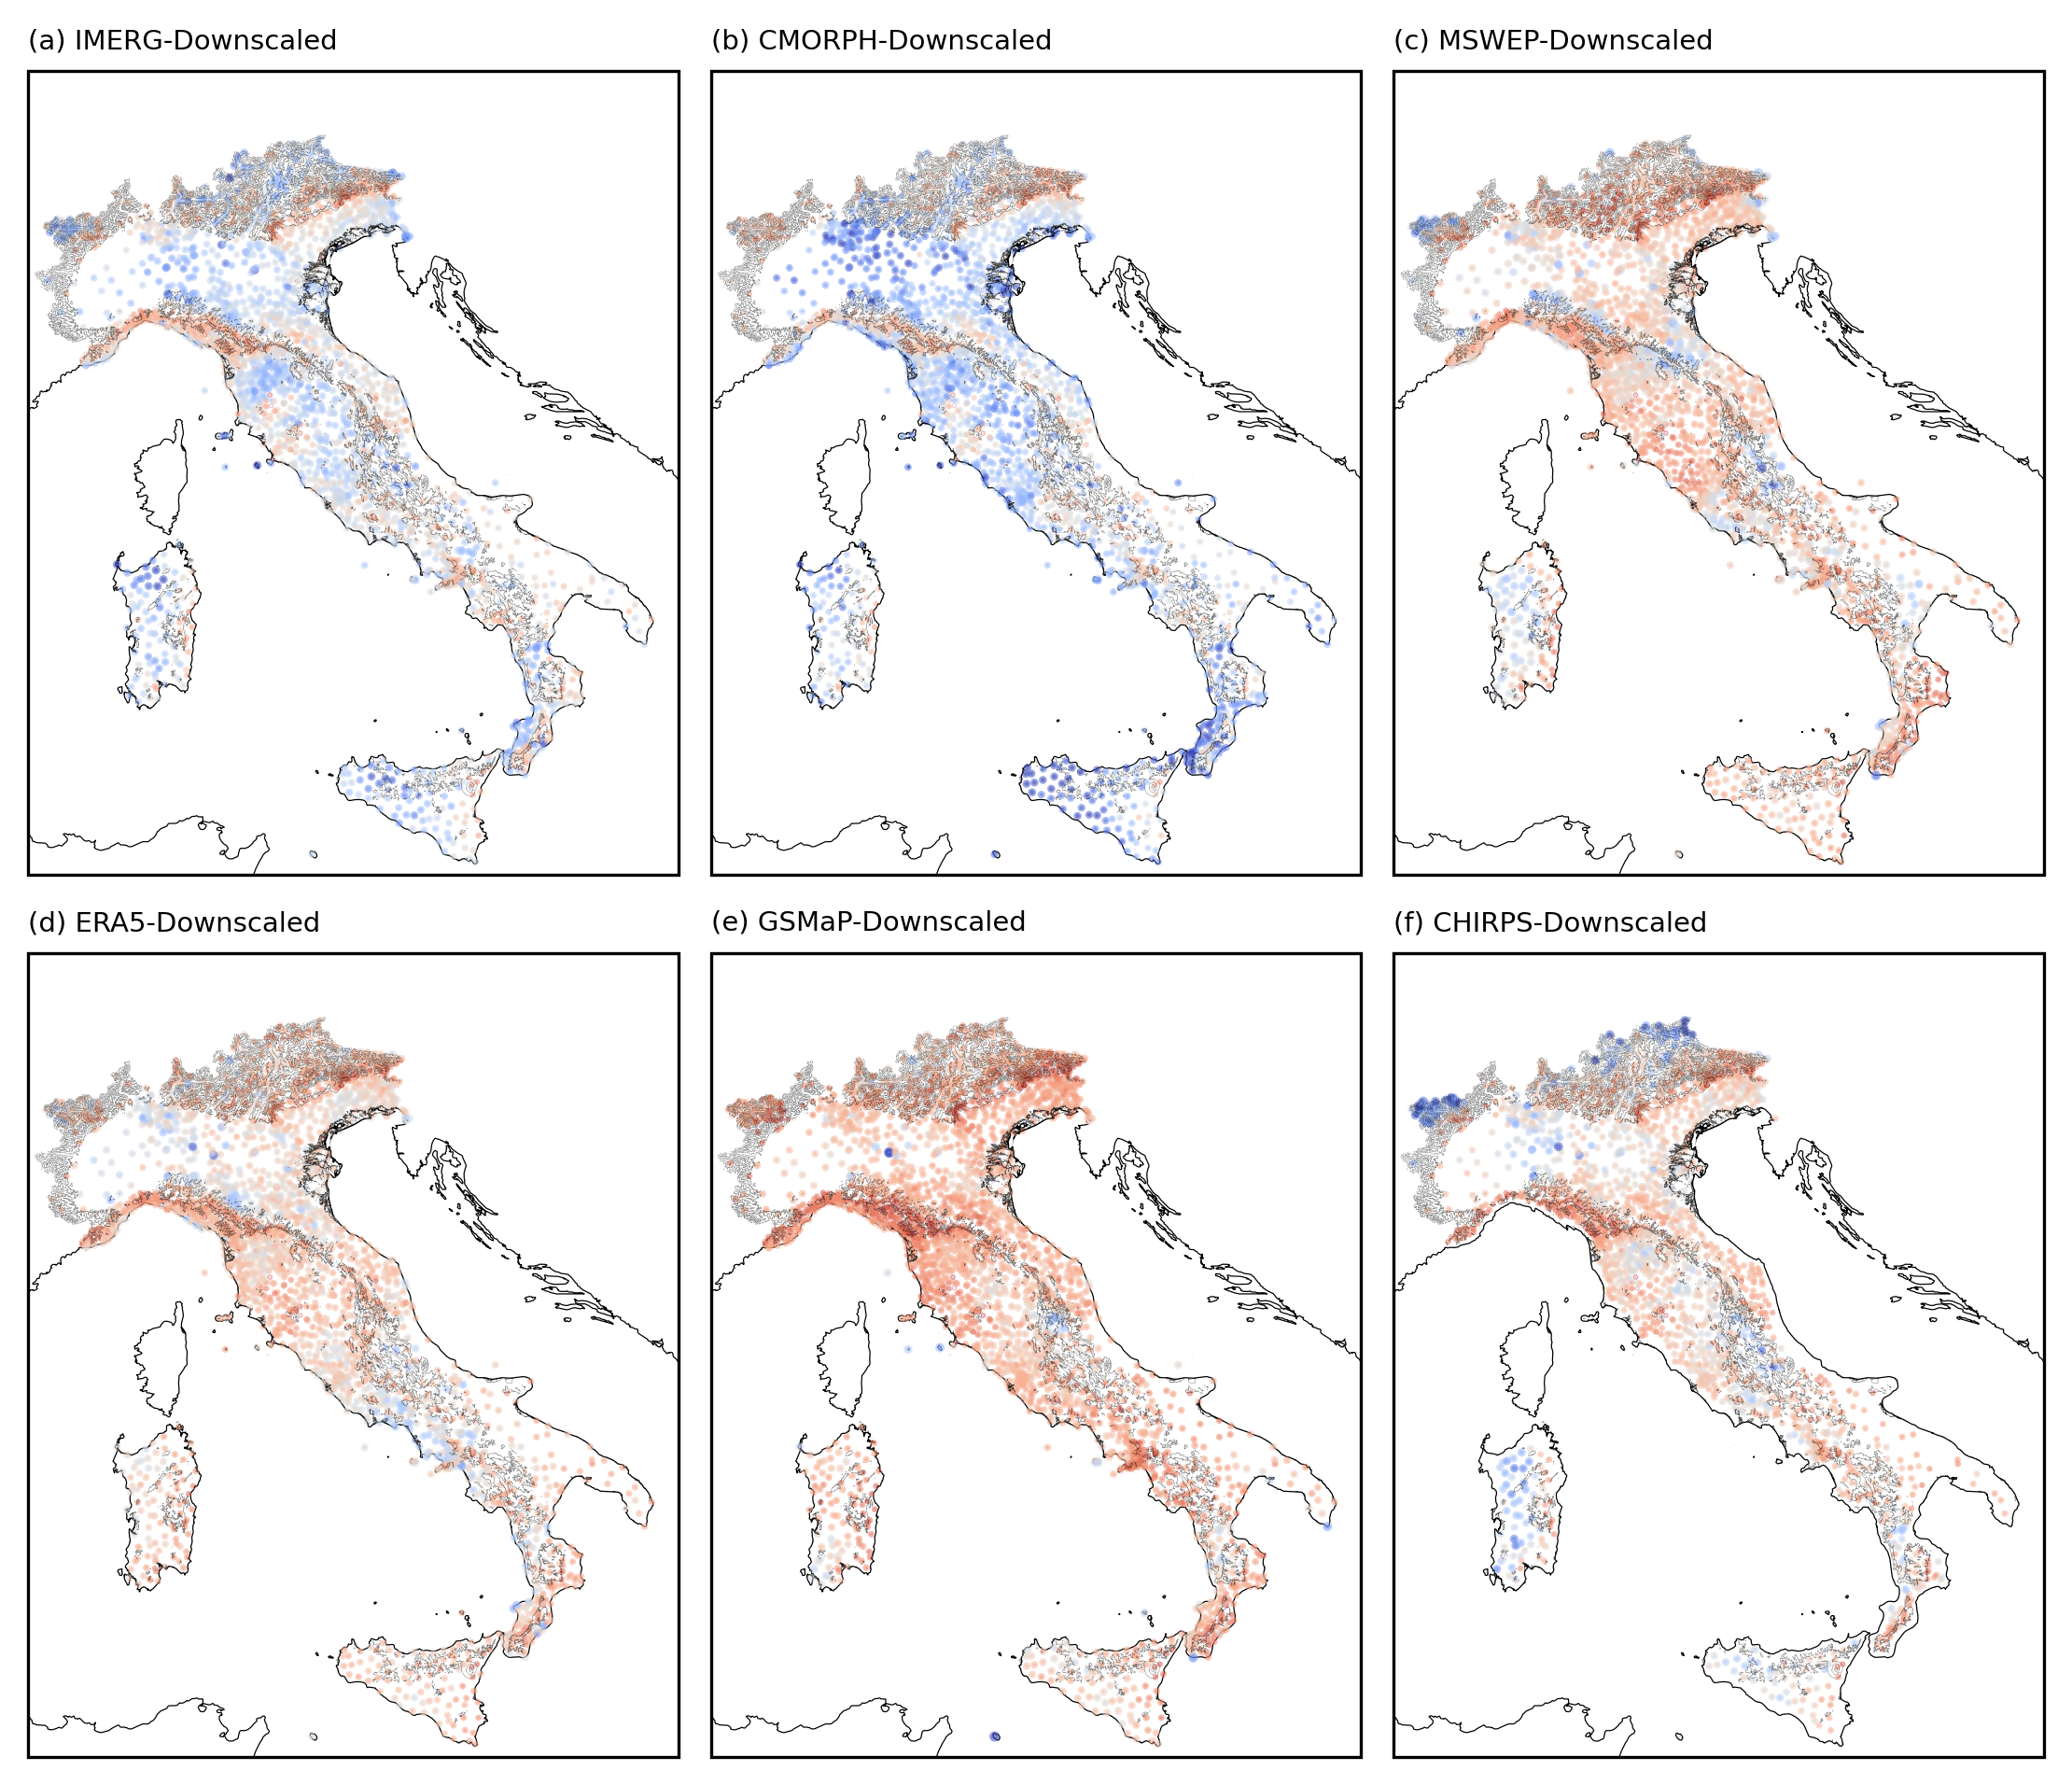

In [192]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8, 7), dpi=300)
gs = gridspec.GridSpec(2, 3)

axes = []
for nraw in range(2):
    for ncol in range(3):
        ax = fig.add_subplot(gs[nraw, ncol], projection=proj)
        DEM.plot(facecolor='None', edgecolor='k', ax=ax, linewidth=0.1, zorder=21, alpha=0.5)
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        ax.coastlines(linewidth=0.3)
        axes.append(ax)

for ax, DF, name, letter in zip(axes, DF_LIST, names_list, letters_list):
    mask = (
    DF['RED'].notna() &
    DF['REDn'].notna() &
    DF['LON'].notna() &
    DF['LAT'].notna()
    )

    ax.scatter(
    DF.loc[mask, 'LON'],
    DF.loc[mask, 'LAT'],
    c=DF.loc[mask, 'RED'],
    cmap='coolwarm_r',
    s=np.array(DF.loc[mask, 'REDn']) * 3,
    alpha=0.5,
    norm=norm,
    zorder=20
    )

    ax.set_title(f'{letter} {name}-Downscaled', fontsize=7, loc='left')

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.05, hspace=0)

-0.21887627162144654